Global Power Plant

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In this particular problem we have two targets & have to find out predictions for Fuel type and capacity_mw.

a) If we consider Fuel type as target then i have to take classification models to predict.

b) If we consider capacity_mw as target then i have to take Regression models to predict.

In [4]:
# now let us consider fuel name as Fuel type as we have predict Fuel type as per problem
data.rename(columns={'primary_fuel':'Fuel_type'},inplace=True)

In [5]:
# EDA

data.shape #Shape of the data set

(908, 25)

In [6]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'Fuel_type', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   Fuel_type                 908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [9]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_type                     0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [10]:
#Droping unnecessary columns
data = data.drop(["other_fuel3"],axis=1)
data = data.drop(["wepp_id"],axis=1)
data = data.drop(["estimated_generation_gwh"],axis=1)
data = data.drop(["other_fuel2"],axis=1)

In [11]:
#Droping unnecessary columns
data = data.drop(["country"],axis=1)
data = data.drop(["country_long"],axis=1)
data= data.drop(["year_of_capacity_data"],axis=1)
data = data.drop(["generation_data_source"],axis=1)

In [13]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [14]:
data.shape

(908, 17)

In [15]:
data['name'].unique() #checking for this columns having unique values

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [16]:
data['name'].value_counts() # similarly checking value_counts

KM DODDI SUGAR                        1
N.A.P.S                               1
CHUTAK                                1
TUTICORIN JV                          1
DUDH GANGA                            1
                                     ..
BELLARY DG                            1
Bap - Punj Lloyd Solar Power Plant    1
NEPANAGAR MILL                        1
Enercon Chitradurga Wind Farm         1
Phagi Solar Power Plant               1
Name: name, Length: 908, dtype: int64

In [17]:
data['gppd_idnr'].value_counts()

WRI1026169    1
IND0000508    1
WRI1026183    1
WRI1019885    1
WRI1026189    1
             ..
WRI1026077    1
WRI1019898    1
IND0000348    1
IND0000366    1
IND0000183    1
Name: gppd_idnr, Length: 908, dtype: int64

In [18]:
data['url'].value_counts()

http://www.cea.nic.in/                                                              520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
http://www.madhavcorp.com                                                             1
http://www.westcoastpaper.com/infrastructure/                                         1
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1355495522.4/view                        1
https://cdm.unfccc.int/Projects/DB/SGS-UKL1374760004.52/view                          1
http://www.meil.in/power-projects                                                     1
Name: url, Length: 304, dtype: i

In [19]:
data['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Vishwanath Sugars ltd                          1
Precision Technik Private Limited              1
Manglam Cement ltd                             1
Bharat Refinery ltd                            1
Indo Synthetics ltd                            1
Name: source, Length: 191, dtype: int64

In [20]:
data['owner'].value_counts()

Jk Cement ltd                    4
Sterling Agro Industries ltd.    4
Acc Acc ltd                      4
Powerica Limited                 3
Jaypee Ltd jccl)                 3
                                ..
Bhilwara Energy Limited          1
KVK Energy Ventures Ltd          1
Videocon Industries Limited      1
Lokmangal Lokmangal group        1
TVS Energy limited               1
Name: owner, Length: 280, dtype: int64

By checking all these 4 columns: 'Name','gppd_idnr','url','owner'. There all columns are unique & also these columns are of no releation with predicted/Target column so it will not impact on the model to predict. So i will drop/remove these columns.

In [25]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [26]:
data.shape

(908, 13)

In [27]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [28]:

data.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
Fuel_type               object
other_fuel1             object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

Instead of commissioning_year the present_power_plant_year will give better model. So am subtrating with this year i.e 2021

In [29]:
data['Present_Power_plant_year'] = 2021 - data['commissioning_year']

In [30]:
data.head()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,10.0
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500,17.0
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,6.0


In [31]:
data.drop(columns=["commissioning_year"],inplace=True)

In [32]:
data.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
Fuel_type                     0
other_fuel1                 709
source                        0
geolocation_source           19
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
Present_Power_plant_year    380
dtype: int64

In [33]:
#Replacing NaN values in numerical columns

data["latitude"] = data["latitude"].fillna(data["latitude"].median())
data["longitude"] = data["longitude"].fillna(data["longitude"].median())
data["Present_Power_plant_year"] = data["Present_Power_plant_year"].fillna(data["Present_Power_plant_year"].median())
data["generation_gwh_2013"] = data["generation_gwh_2013"].fillna(data["generation_gwh_2013"].median())
data["generation_gwh_2014"] = data["generation_gwh_2014"].fillna(data["generation_gwh_2014"].median())
data["generation_gwh_2015"] = data["generation_gwh_2015"].fillna(data["generation_gwh_2015"].median())
data["generation_gwh_2016"] = data["generation_gwh_2016"].fillna(data["generation_gwh_2016"].median())
data["generation_gwh_2017"] = data["generation_gwh_2017"].fillna(data["generation_gwh_2017"].median())

In [34]:
#Replacing NaN values in categorical columns

data["other_fuel1"] = data["other_fuel1"].fillna(data["other_fuel1"].mode()[0])
data["geolocation_source"] = data["geolocation_source"].fillna(data["geolocation_source"].mode()[0])

In [35]:
# Now checking again Null values after this replacement.
data.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
Fuel_type                   0
other_fuel1                 0
source                      0
geolocation_source          0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
Present_Power_plant_year    0
dtype: int64

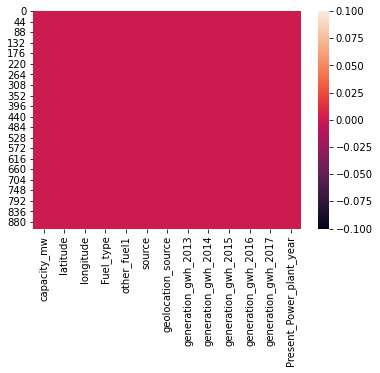

<Figure size 864x288 with 0 Axes>

In [36]:
# Now again checking with visulization Heat map
sns.heatmap(data.isnull())
plt.figure(figsize=[12,4])
plt.show()

In [37]:
# Now checking the skwennes of the data set.
data.skew()

capacity_mw                 3.193257
latitude                   -0.161811
longitude                   1.150963
generation_gwh_2013         5.535740
generation_gwh_2014         5.325540
generation_gwh_2015         5.565770
generation_gwh_2016         5.278233
generation_gwh_2017         5.312975
Present_Power_plant_year    1.650230
dtype: float64

<AxesSubplot:ylabel='Frequency'>

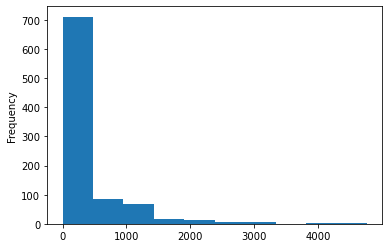

In [38]:
# skewness visulization for each column done by
data['capacity_mw'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

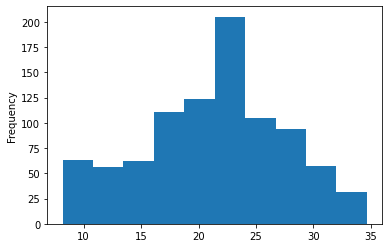

In [39]:
data['latitude'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

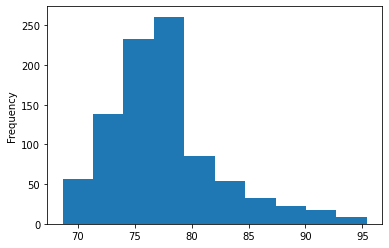

In [40]:
data['longitude'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

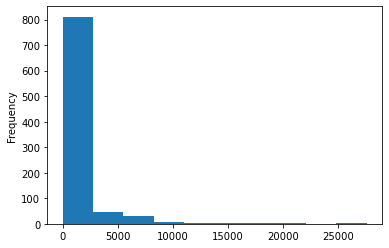

In [41]:
data['generation_gwh_2013'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

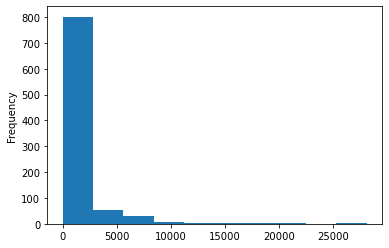

In [42]:
data['generation_gwh_2014'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

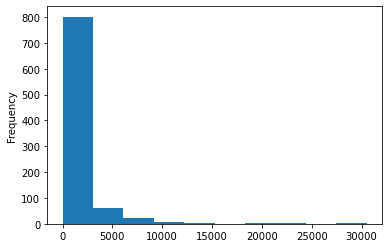

In [43]:
data['generation_gwh_2015'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

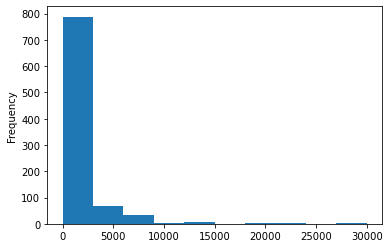

In [44]:
data['generation_gwh_2016'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

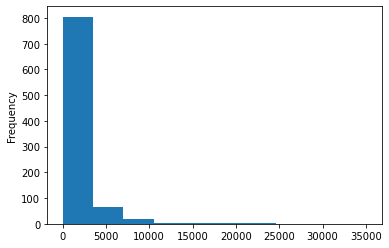

In [45]:
data['generation_gwh_2017'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

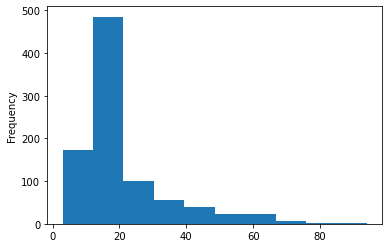

In [46]:
data['Present_Power_plant_year'].plot.hist()

In [47]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method

skew = ['capacity_mw','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Present_Power_plant_year']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [48]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,capacity_mw,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,-1.695723,-0.945660,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,-1.143845
1,0.192511,-0.534583,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
2,-0.294920,-2.390876,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
3,0.360587,2.181487,-0.234814,-0.246450,0.081323,0.097738,-0.175277,-0.315269
4,1.660257,1.132342,0.615682,1.151206,1.837256,1.845609,1.623273,-1.824023


In [49]:

data.skew()

capacity_mw                 0.020461
latitude                   -0.161811
longitude                   0.002567
generation_gwh_2013         0.313991
generation_gwh_2014         0.286606
generation_gwh_2015         0.220431
generation_gwh_2016         0.201832
generation_gwh_2017         0.194047
Present_Power_plant_year    0.023976
dtype: float64

In [ ]:
# Skewness is within the range of -0.5 to +0.5

<AxesSubplot:ylabel='Frequency'>

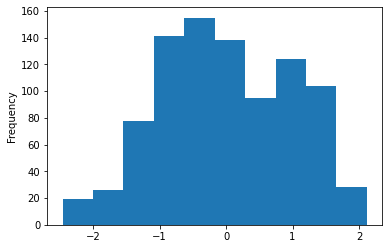

In [50]:
data['capacity_mw'].plot.hist()

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

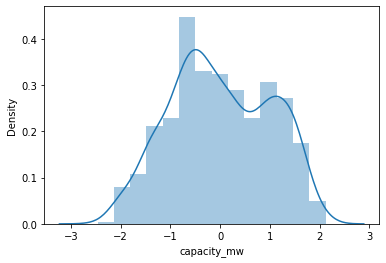

In [51]:
# Distribution Plot

sns.distplot(data['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

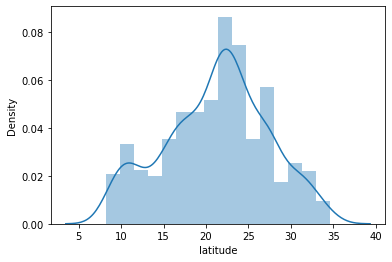

In [52]:
sns.distplot(data['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

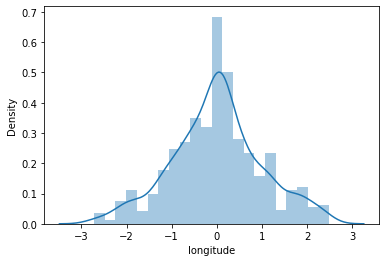

In [53]:
sns.distplot(data['longitude'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

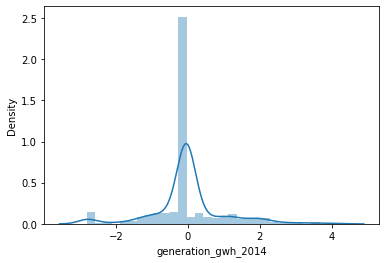

In [54]:
sns.distplot(data['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

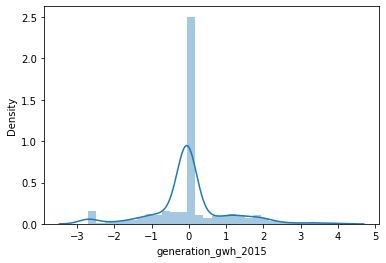

In [55]:
sns.distplot(data['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

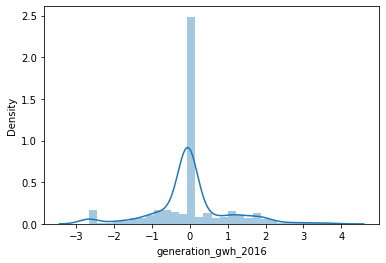

In [56]:
sns.distplot(data['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

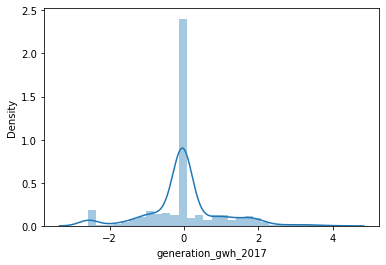

In [57]:
sns.distplot(data['generation_gwh_2017'])

<AxesSubplot:xlabel='Present_Power_plant_year', ylabel='Density'>

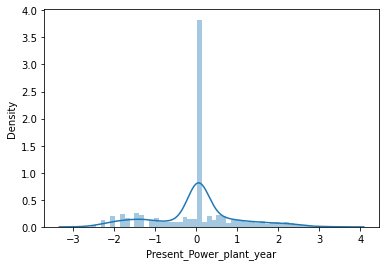

In [58]:
sns.distplot(data['Present_Power_plant_year'])

In [59]:
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
count,9.080000e+02,908.000000,908.000000,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02,9.080000e+02
mean,-1.809615e-17,21.225679,0.000001,-1.184350e-16,-3.302700e-16,8.866195e-17,-6.694351e-16,-2.698832e-16,2.493264e-16
std,1.000551e+00,6.089450,1.000551,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00,1.000551e+00
min,-2.462841e+00,8.168900,-2.719831,-3.040344e+00,-2.801534e+00,-2.710369e+00,-2.674396e+00,-2.585412e+00,-2.571587e+00
25%,-7.479067e-01,17.057825,-0.597316,-4.671209e-02,-4.548588e-02,-5.363672e-02,-5.498394e-02,-3.867305e-02,-2.182960e-01
50%,-6.745980e-02,21.778300,0.018127,-4.671209e-02,-4.548588e-02,-5.363672e-02,-5.498394e-02,-3.867305e-02,5.096106e-02
75%,9.037772e-01,25.183775,0.564832,-4.671209e-02,-4.548588e-02,-5.363672e-02,-5.498394e-02,-3.867305e-02,2.934703e-01
max,2.119435e+00,34.649000,2.485881,4.306772e+00,4.121080e+00,3.930232e+00,3.822979e+00,4.073100e+00,3.315672e+00


In [62]:
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)




['Fuel_type', 'other_fuel1', 'source', 'geolocation_source']


In [63]:

numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Present_Power_plant_year']


<AxesSubplot:>

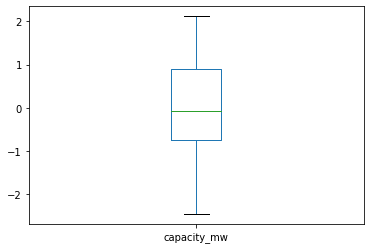

In [64]:
# Outliers

data['capacity_mw'].plot.box()

<AxesSubplot:>

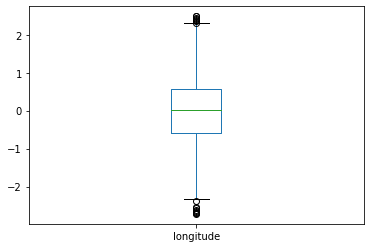

In [65]:
data['longitude'].plot.box()

<AxesSubplot:>

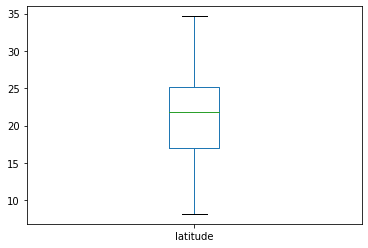

In [66]:
data['latitude'].plot.box()

<AxesSubplot:>

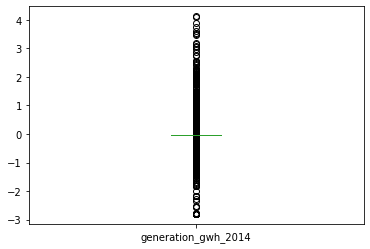

In [67]:
data['generation_gwh_2014'].plot.box()

<AxesSubplot:>

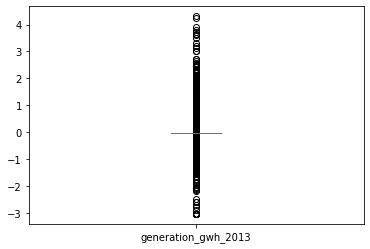

In [68]:
data['generation_gwh_2013'].plot.box()

<AxesSubplot:>

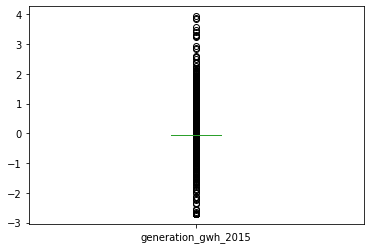

In [69]:
data['generation_gwh_2015'].plot.box()

<AxesSubplot:>

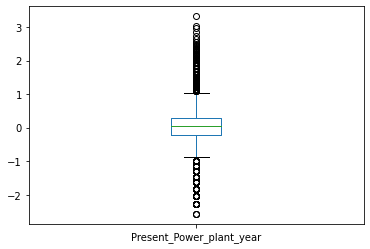

In [70]:
data['Present_Power_plant_year'].plot.box()

<AxesSubplot:>

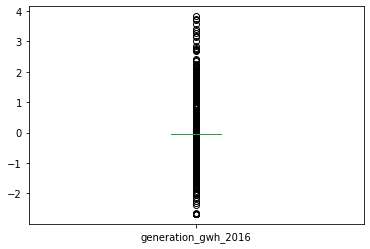

In [71]:
data['generation_gwh_2016'].plot.box()

<AxesSubplot:>

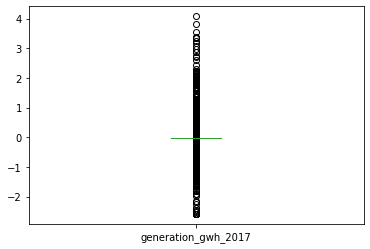

In [72]:
data['generation_gwh_2017'].plot.box()

In [73]:
# Removing outliers by z-score

columns = data[['longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'Present_Power_plant_year']]

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(columns))
z

array([[0.94566101, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        1.14384466],
       [0.53458397, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106],
       [2.39087749, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106],
       ...,
       [0.2685914 , 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106],
       [0.78805285, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106],
       [0.19542302, 0.04671209, 0.04548588, ..., 0.05498394, 0.03867305,
        0.05096106]])

In [75]:
d1=data[(z<3).all(axis=1)]
d1

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,-1.695723,28.1839,-0.945660,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,-1.143845
1,0.192511,24.7663,-0.534583,Coal,Oil,Ultratech Cement ltd,WRI,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
2,-0.294920,21.9038,-2.390876,Wind,Oil,CDM,WRI,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
3,0.360587,23.8712,2.181487,Gas,Oil,Central Electricity Authority,WRI,-0.234814,-0.246450,0.081323,0.097738,-0.175277,-0.315269
4,1.660257,21.9603,1.132342,Coal,Oil,Central Electricity Authority,WRI,0.615682,1.151206,1.837256,1.845609,1.623273,-1.824023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1.603578,16.2949,0.168021,Coal,Oil,Central Electricity Authority,WRI,-0.046712,-0.045486,-2.561939,-0.764834,0.010848,-2.039894
904,-1.615938,12.8932,0.347894,Solar,Oil,Karnataka Power Corporation Limited,Industry About,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
905,-0.525593,15.2758,-0.268590,Wind,Oil,CDM,WRI,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961
906,0.085318,24.3500,-0.788052,Coal,Oil,Hindustan Zinc ltd,WRI,-0.046712,-0.045486,-0.053637,-0.054984,-0.038673,0.050961


In [76]:
d1.shape

(869, 13)

In [77]:
data.shape

(908, 13)

In [78]:
#checking how much data has been lossed
data_loss= (908-869)/908*100
data_loss

4.295154185022026

In [79]:
# Encoding

categorical_col = ['Fuel_type', 'other_fuel1', 'source', 'geolocation_source']

In [82]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
d1[categorical_col]= d1[categorical_col].apply(LE.fit_transform)

In [83]:
d1[categorical_col]

,Fuel_type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
903,1,2,22,2
904,6,2,77,0
905,7,2,21,2
906,1,2,59,2


In [84]:
# Corelation

d1.corr()

,capacity_mw,latitude,longitude,Fuel_type,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
capacity_mw,1.000000,0.050811,0.326560,-0.523335,-0.039800,-0.390475,0.473651,0.369628,0.358084,0.346800,0.374825,0.348861,-0.264159
latitude,0.050811,1.000000,-0.045218,-0.008068,0.035085,0.058263,-0.187282,0.076695,0.107101,0.104929,0.132419,0.107988,-0.094910
longitude,0.326560,-0.045218,1.000000,-0.399964,0.015376,-0.247654,0.298503,0.027163,0.010302,0.012792,0.069433,0.047254,-0.111517
Fuel_type,-0.523335,-0.008068,-0.399964,1.000000,0.018399,0.042576,-0.481733,-0.168452,-0.157926,-0.160915,-0.181264,-0.159474,0.135736
other_fuel1,-0.039800,0.035085,0.015376,0.018399,1.000000,0.022912,-0.018413,-0.020853,-0.026924,0.006508,0.027172,0.028244,-0.015521
source,-0.390475,0.058263,-0.247654,0.042576,0.022912,1.000000,-0.501614,-0.043325,-0.032814,-0.026821,-0.028185,-0.014949,-0.009915
geolocation_source,0.473651,-0.187282,0.298503,-0.481733,-0.018413,-0.501614,1.000000,0.034817,0.026371,0.021554,0.022650,0.012014,-0.004798
generation_gwh_2013,0.369628,0.076695,0.027163,-0.168452,-0.020853,-0.043325,0.034817,1.000000,0.869258,0.755007,0.712953,0.647658,-0.076602
generation_gwh_2014,0.358084,0.107101,0.010302,-0.157926,-0.026924,-0.032814,0.026371,0.869258,1.000000,0.814102,0.761489,0.684697,-0.107175
generation_gwh_2015,0.346800,0.104929,0.012792,-0.160915,0.006508,-0.026821,0.021554,0.755007,0.814102,1.000000,0.878689,0.756313,-0.128037


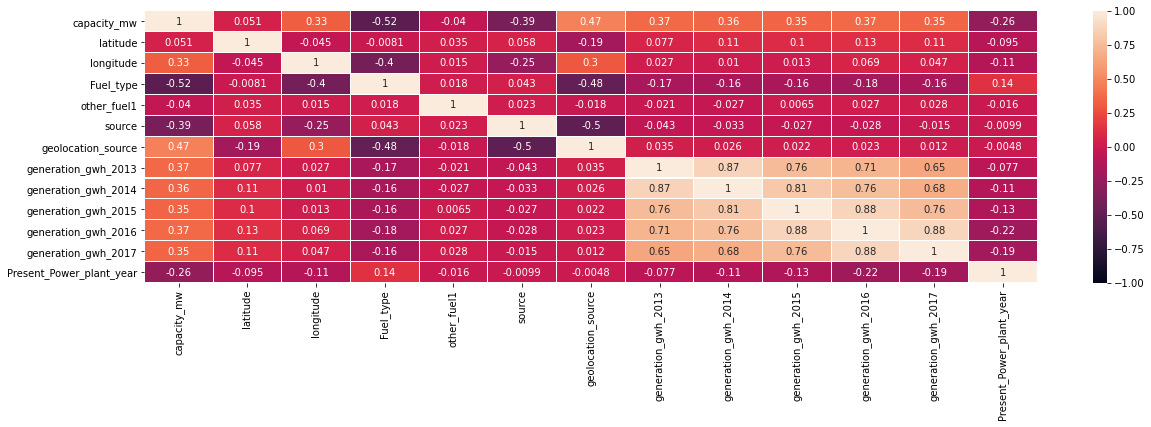

In [89]:
plt.figure(figsize=(20,5))
sns.heatmap(d1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True,annot_kws={'size':10})
plt.yticks(rotation=0);

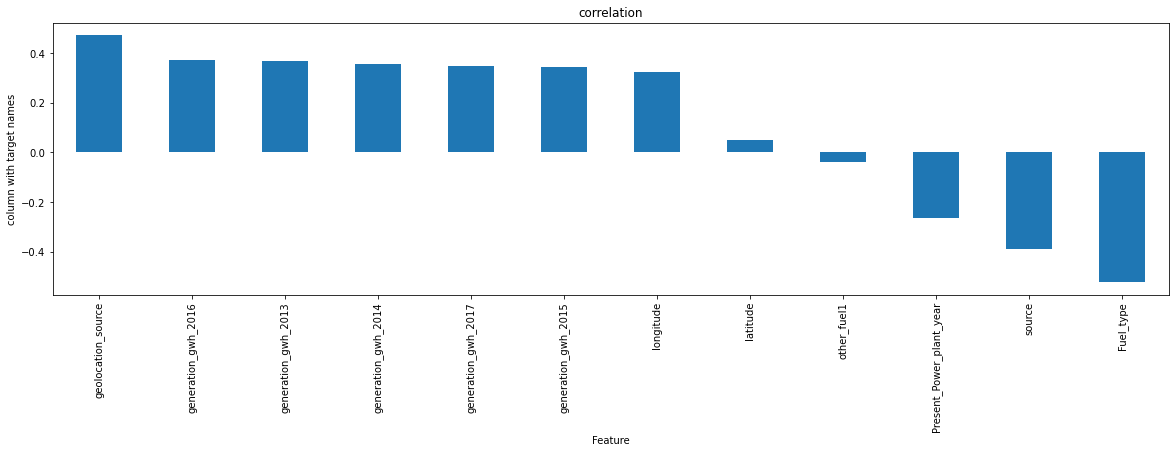

In [92]:
#Correlation B/W fuel tpe & features

plt.figure(figsize=(20,5))
d1.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('column with target names')
plt.title('correlation')
plt.show()

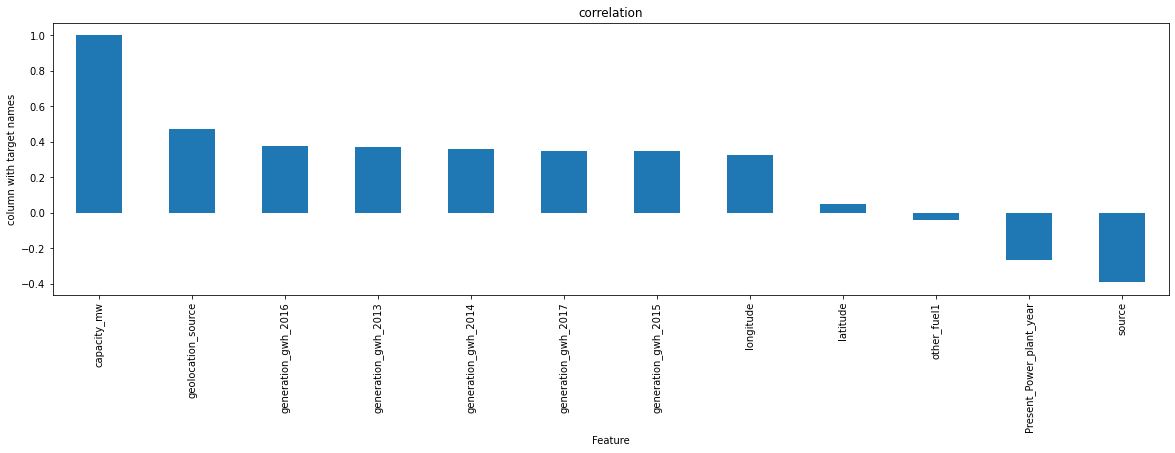

In [93]:
plt.figure(figsize=(20,5))
d1.corr()['capacity_mw'].sort_values(ascending=False).drop(['Fuel_type']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('column with target names')
plt.title('correlation')
plt.show()

In [96]:
#Droping less correlated column
d1 = d1.drop(["other_fuel1"],axis=1)
d1 = d1.drop(["latitude"],axis=1)

In [99]:
# Feature Scaling

#Using Standard Scalarization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d1 = pd.DataFrame(scaler.fit_transform(d1), columns=d1.columns)
d1

,capacity_mw,longitude,Fuel_type,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Present_Power_plant_year
0,-1.684285,-0.938531,1.191981,1.415781,-1.047102,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,-1.175900
1,0.243005,-0.524406,-0.984136,2.849277,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
2,-0.254508,-2.394462,1.627205,-0.524951,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
3,0.414557,2.211800,-0.548912,-0.502897,0.404145,-0.327703,-0.312589,0.104273,0.120564,-0.185635,-0.335080
4,1.741109,1.154877,-0.984136,-0.502897,0.404145,0.764470,1.407588,2.154857,2.141815,1.867088,-1.866131
...,...,...,...,...,...,...,...,...,...,...,...
864,1.683258,0.183407,-0.984136,-0.502897,0.404145,-0.086150,-0.065251,-2.982534,-0.876921,0.026792,-2.085192
865,-1.602850,0.364613,1.191981,0.710060,-2.498349,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
866,-0.489952,-0.256442,1.627205,-0.524951,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563
867,0.133595,-0.779754,-0.984136,0.313093,0.404145,-0.086150,-0.065251,-0.053333,-0.056045,-0.029726,0.036563


In [101]:
x = d1.drop("capacity_mw",axis=1)
y = d1["capacity_mw"]

In [102]:
x.skew()

longitude                   0.031907
Fuel_type                   0.428812
source                      1.758892
geolocation_source         -2.087658
generation_gwh_2013         0.574102
generation_gwh_2014         0.141381
generation_gwh_2015        -0.099889
generation_gwh_2016        -0.071387
generation_gwh_2017        -0.128588
Present_Power_plant_year   -0.042046
dtype: float64

In [103]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [108]:
feature=['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [109]:
x[feature].skew()

longitude              0.031907
generation_gwh_2013    0.574102
generation_gwh_2014    0.141381
generation_gwh_2015   -0.099889
generation_gwh_2016   -0.071387
generation_gwh_2017   -0.128588
dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='Density'>

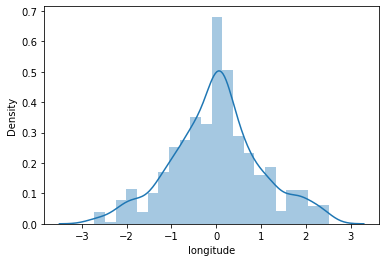

In [110]:
sns.distplot(x['longitude'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

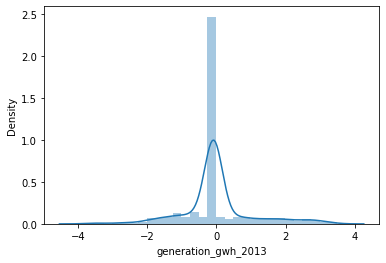

In [111]:
sns.distplot(x['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

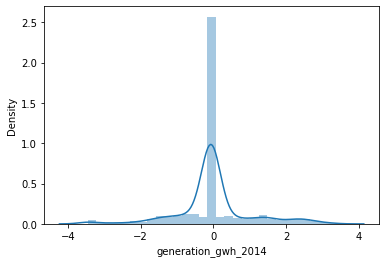

In [112]:
sns.distplot(x['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

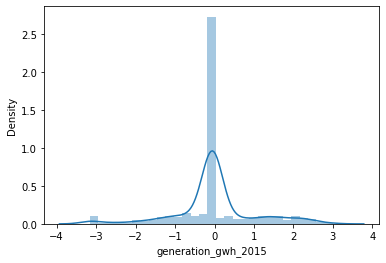

In [113]:
sns.distplot(x['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

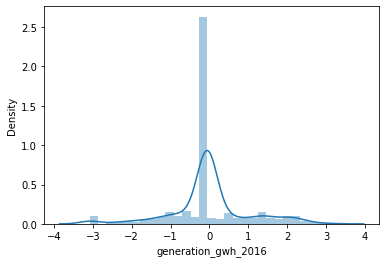

In [114]:
sns.distplot(x['generation_gwh_2016'])

In [116]:
# Scaling

from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [117]:
# Using VIF to remove multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.296806,longitude
1,1.687367,Fuel_type
2,1.518789,source
3,1.893000,geolocation_source
4,4.268942,generation_gwh_2013
5,5.415737,generation_gwh_2014
6,5.845521,generation_gwh_2015
7,9.051502,generation_gwh_2016
8,4.675604,generation_gwh_2017
9,1.093084,Present_Power_plant_year


In [ ]:
# Above output Looks good

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8424864469104496  on Random_state  145


In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [126]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [125]:
# Decision TreeRegressor

from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))


R2_score: 0.6942070795846775


In [133]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.5926773393410374


In [128]:
# Random Forest Regressor

RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.8363256969203969


In [132]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.7692126476370778


In [129]:
# Gradient Boosting

GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.834158221278729


In [134]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.7884512889341854


In [130]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.7523765295776152


In [135]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7047658706501456


In [ ]:
#Hyper Parameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
parameter = {'criterion': ['mse','mae'],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8],
            'max_features':['auto','sqrt','log2'],
            'bootstrap': [True, False]}

In [138]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [139]:
F_mod=RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=8,max_features='log2',n_estimators=400,)
F_mod.fit(X_train,y_train)
pred=F_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)

R2_Score: 85.11743748479915


In [140]:
import joblib
joblib.dump(F_mod,"Capacity.pk")

['Capacity.pk']